part a

In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
def normalized_ssd(img1, img2):
    if img1.shape != img2.shape:
        print(f"Warning: Shapes do not match! {img1.shape} vs {img2.shape}")
    
    i1 = img1.astype(np.float64)
    i2 = img2.astype(np.float64)

    diff = i1 - i2
    sq_diff = diff ** 2
    sum_sq_diff = np.sum(sq_diff)
    
    normalization = np.sum(i1 ** 2)
    
    if normalization == 0:
        return 0
        
    nssd = sum_sq_diff / normalization
    return nssd

In [13]:
def zoom_image(image, scale, interpolation='nearest', target_shape=None):
    """
    target_shape: tuple (height, width) - forces output to this exact size
    """
    h, w = image.shape[:2]
    
    # 1. Determine Output Dimensions
    if target_shape is not None:
        new_h, new_w = target_shape
        # Recalculate scale effectively for the math to work correctly
        scale_h = new_h / h
        scale_w = new_w / w
    else:
        new_h = int(h * scale)
        new_w = int(w * scale)
        scale_h = scale
        scale_w = scale
    
    # ---------------------------------------------------------
    # METHOD 1: NEAREST NEIGHBOR
    # ---------------------------------------------------------
    if interpolation == 'nearest':
        # Use separate scales for H and W to hit target exactly
        row_indices = (np.arange(new_h) / scale_h).astype(int)
        col_indices = (np.arange(new_w) / scale_w).astype(int)
        
        row_indices = np.clip(row_indices, 0, h - 1)
        col_indices = np.clip(col_indices, 0, w - 1)
        
        return image[row_indices[:, None], col_indices]

    # ---------------------------------------------------------
    # METHOD 2: BILINEAR INTERPOLATION
    # ---------------------------------------------------------
    elif interpolation == 'bilinear':
        # Use separate scales
        row_idx = (np.arange(new_h) + 0.5) / scale_h - 0.5
        col_idx = (np.arange(new_w) + 0.5) / scale_w - 0.5
        
        r_floor = np.floor(row_idx).astype(int)
        c_floor = np.floor(col_idx).astype(int)
        
        r_ceil = r_floor + 1
        c_ceil = c_floor + 1
        
        r_floor = np.clip(r_floor, 0, h - 1)
        c_floor = np.clip(c_floor, 0, w - 1)
        r_ceil = np.clip(r_ceil, 0, h - 1)
        c_ceil = np.clip(c_ceil, 0, w - 1)
        
        delta_r = (row_idx - r_floor)[:, None]
        delta_c = (col_idx - c_floor)
        
        top_left = image[r_floor[:, None], c_floor]
        top_right = image[r_floor[:, None], c_ceil]
        bottom_left = image[r_ceil[:, None], c_floor]
        bottom_right = image[r_ceil[:, None], c_ceil]
        
        top_interp = top_left * (1 - delta_c) + top_right * delta_c
        bottom_interp = bottom_left * (1 - delta_c) + bottom_right * delta_c
        
        final_values = top_interp * (1 - delta_r) + bottom_interp * delta_r
        
        return final_values.astype(np.uint8)

Calculated Scale Factor: 4.00
Zooming nearest: 480x270 -> 1920x1080
Zooming bilinear: 480x270 -> 1920x1080

--- Results ---
SSD (Nearest Neighbor): 0.011756
SSD (Bilinear):         0.009912


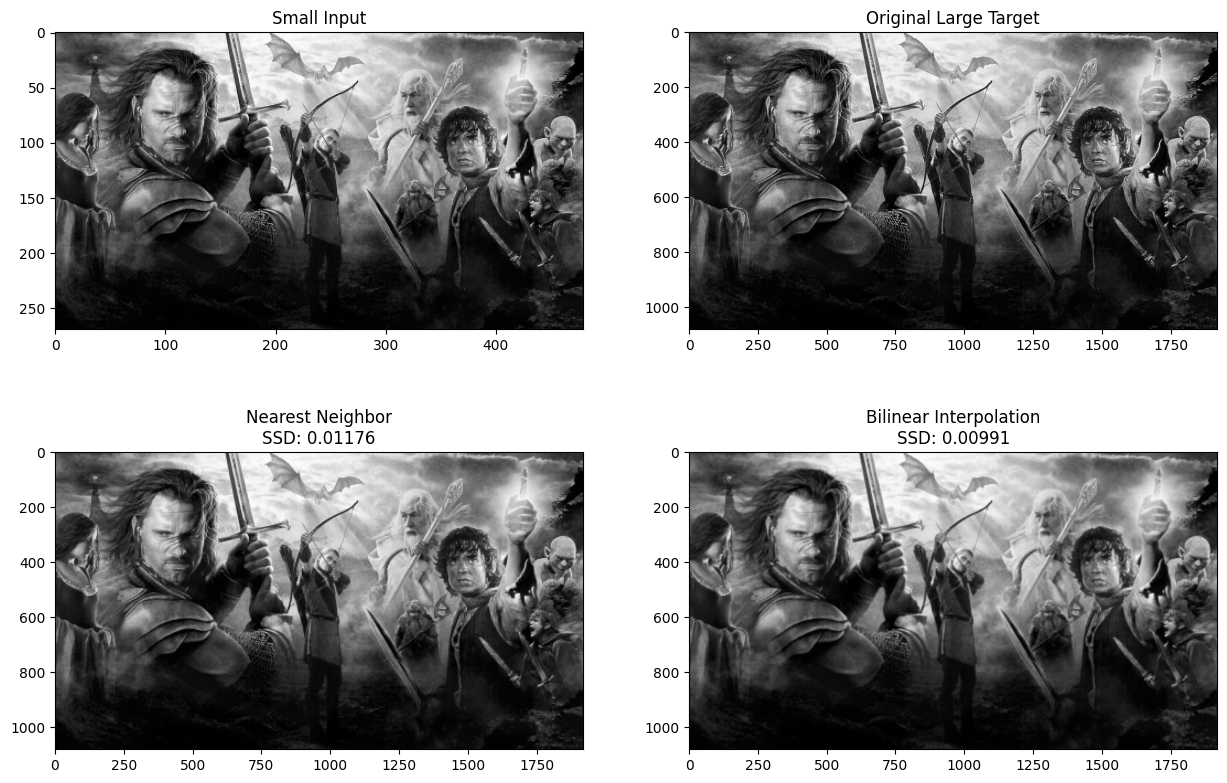

In [4]:
# ==========================================
# MAIN EXECUTION & TESTING
# ==========================================
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
large_path = 'media/images_for_zooming/a1q5images/im01.png'
small_path = 'media/images_for_zooming/a1q5images/im01small.png'

small_img = cv.imread(small_path, cv.IMREAD_GRAYSCALE)
large_img = cv.imread(large_path, cv.IMREAD_GRAYSCALE)

if small_img is None or large_img is None:
    print("Error: Could not load images. Check paths.")
else:
    target_height = large_img.shape[0]
    current_height = small_img.shape[0]
    
    calculated_scale = target_height / current_height
    print(f"Calculated Scale Factor: {calculated_scale:.2f}")

    zoom_nn = zoom_image(small_img, calculated_scale, 'nearest')
    zoom_bl = zoom_image(small_img, calculated_scale, 'bilinear')

    ssd_nn = normalized_ssd(large_img, zoom_nn)
    ssd_bl = normalized_ssd(large_img, zoom_bl)

    print(f"\n--- Results ---")
    print(f"SSD (Nearest Neighbor): {ssd_nn:.6f}")
    print(f"SSD (Bilinear):         {ssd_bl:.6f}")

    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(small_img, cmap='gray')
    plt.title("Small Input")
    
    plt.subplot(2, 2, 2)
    plt.imshow(large_img, cmap='gray')
    plt.title("Original Large Target")
    
    plt.subplot(2, 2, 3)
    plt.imshow(zoom_nn, cmap='gray')
    plt.title(f"Nearest Neighbor\nSSD: {ssd_nn:.5f}")
    
    plt.subplot(2, 2, 4)
    plt.imshow(zoom_bl, cmap='gray')
    plt.title(f"Bilinear Interpolation\nSSD: {ssd_bl:.5f}")
    
    plt.show()

Calculated Scale Factor: 4.00
Zooming nearest: 480x300 -> 1920x1200
Zooming bilinear: 480x300 -> 1920x1200

--- Results ---
SSD (Nearest Neighbor): 0.004258
SSD (Bilinear):         0.002949


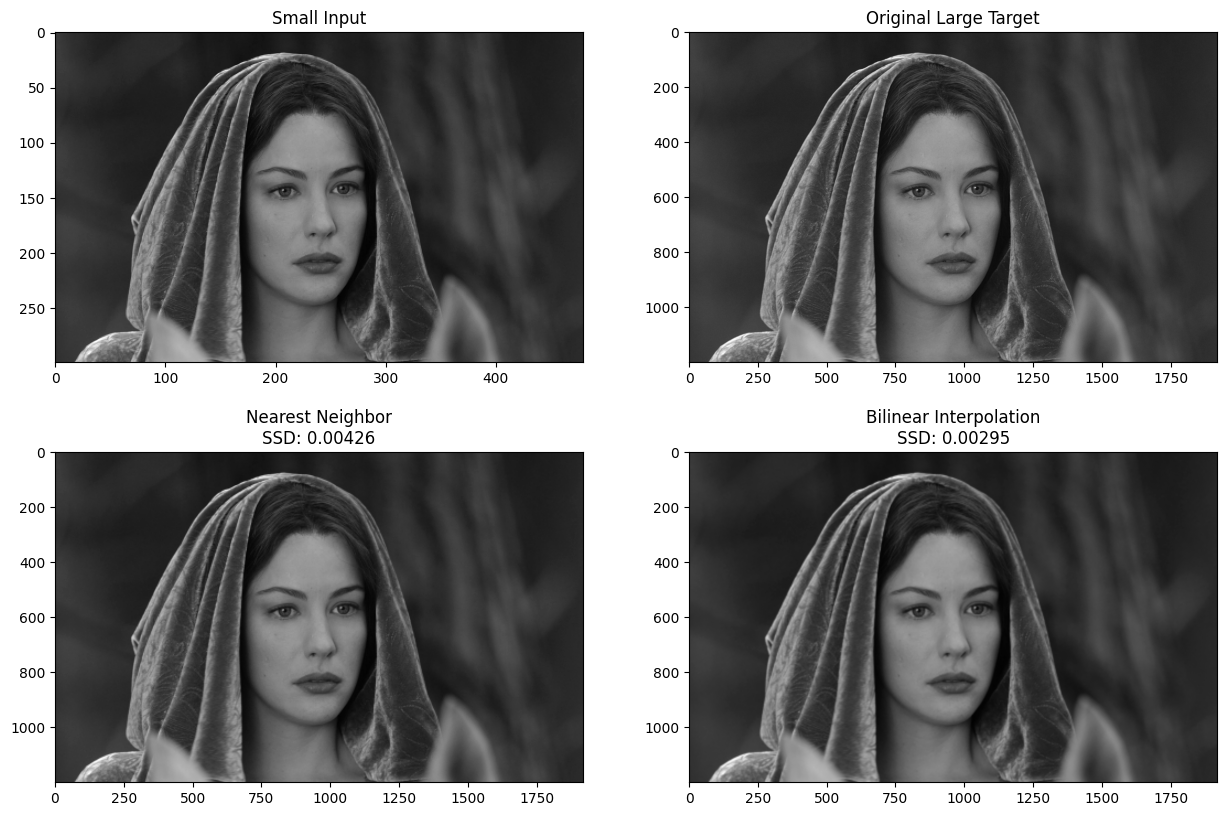

In [5]:
large_path = 'media/images_for_zooming/a1q5images/im02.png'
small_path = 'media/images_for_zooming/a1q5images/im02small.png'

small_img = cv.imread(small_path, cv.IMREAD_GRAYSCALE)
large_img = cv.imread(large_path, cv.IMREAD_GRAYSCALE)

if small_img is None or large_img is None:
    print("Error: Could not load images. Check paths.")
else:
    target_height = large_img.shape[0]
    current_height = small_img.shape[0]
    
    calculated_scale = target_height / current_height
    print(f"Calculated Scale Factor: {calculated_scale:.2f}")

    zoom_nn = zoom_image(small_img, calculated_scale, 'nearest')
    zoom_bl = zoom_image(small_img, calculated_scale, 'bilinear')

    ssd_nn = normalized_ssd(large_img, zoom_nn)
    ssd_bl = normalized_ssd(large_img, zoom_bl)

    print(f"\n--- Results ---")
    print(f"SSD (Nearest Neighbor): {ssd_nn:.6f}")
    print(f"SSD (Bilinear):         {ssd_bl:.6f}")

    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(small_img, cmap='gray')
    plt.title("Small Input")
    
    plt.subplot(2, 2, 2)
    plt.imshow(large_img, cmap='gray')
    plt.title("Original Large Target")
    
    plt.subplot(2, 2, 3)
    plt.imshow(zoom_nn, cmap='gray')
    plt.title(f"Nearest Neighbor\nSSD: {ssd_nn:.5f}")
    
    plt.subplot(2, 2, 4)
    plt.imshow(zoom_bl, cmap='gray')
    plt.title(f"Bilinear Interpolation\nSSD: {ssd_bl:.5f}")
    
    plt.show()

Target Shape: 1459x2400
Calculated Scale Factor: 4.00

--- Results ---
SSD (Nearest Neighbor): 0.007628
SSD (Bilinear):         0.005599


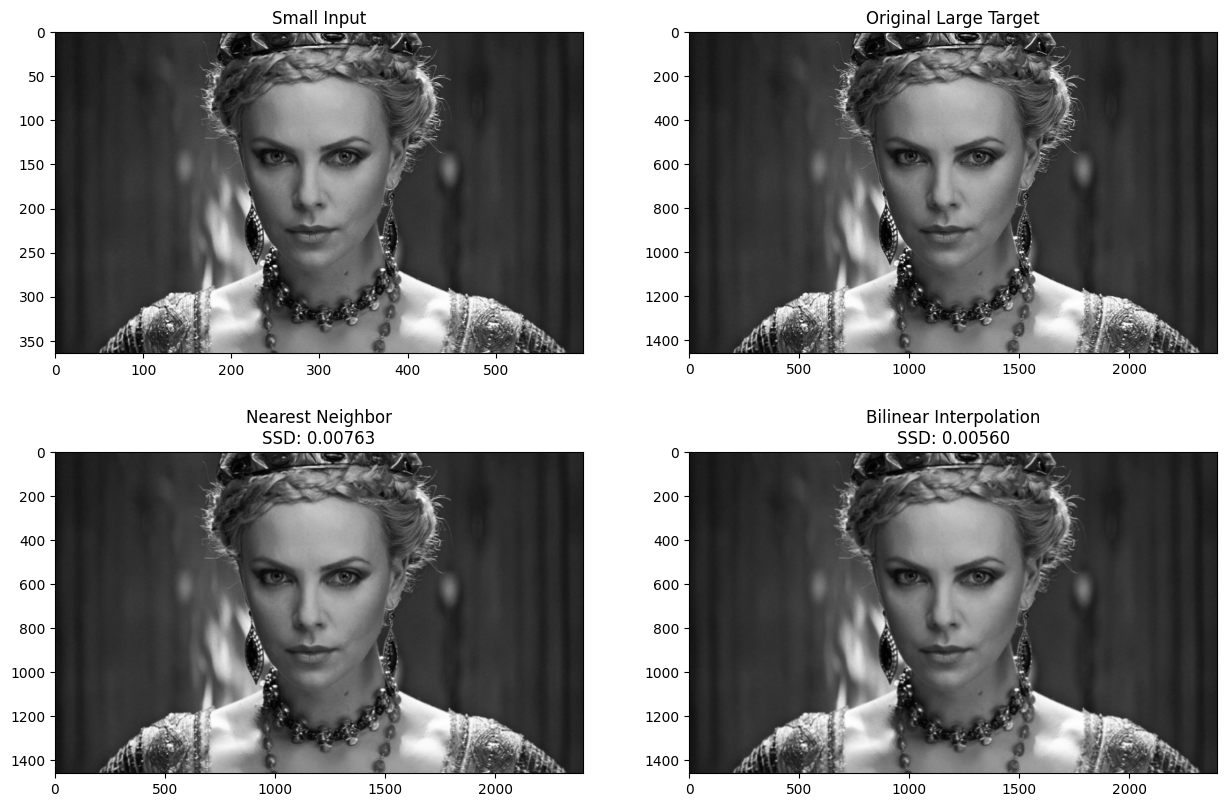

In [14]:

large_path = 'media/images_for_zooming/a1q5images/im03.png'
small_path = 'media/images_for_zooming/a1q5images/im03small.png'

small_img = cv.imread(small_path, cv.IMREAD_GRAYSCALE)
large_img = cv.imread(large_path, cv.IMREAD_GRAYSCALE)

target_h, target_w = large_img.shape
print(f"Target Shape: {target_h}x{target_w}")
    
    # # (a) Nearest Neighbor
    # zoom_nn = zoom_image(small_img, 1, 'nearest', target_shape=(target_h, target_w))
    
    # # (b) Bilinear Interpolation
    # zoom_bl = zoom_image(small_img, 1, 'bilinear', target_shape=(target_h, target_w))

if small_img is None or large_img is None:
    print("Error: Could not load images. Check paths.")
else:
    target_height = large_img.shape[0]
    current_height = small_img.shape[0]
    
    calculated_scale = target_height / current_height
    print(f"Calculated Scale Factor: {calculated_scale:.2f}")

    zoom_nn = zoom_image(small_img, calculated_scale, 'nearest', target_shape=(target_height, large_img.shape[1]))
    zoom_bl = zoom_image(small_img, 1, 'bilinear', target_shape=(target_h, target_w))

    ssd_nn = normalized_ssd(large_img, zoom_nn)
    ssd_bl = normalized_ssd(large_img, zoom_bl)

    print(f"\n--- Results ---")
    print(f"SSD (Nearest Neighbor): {ssd_nn:.6f}")
    print(f"SSD (Bilinear):         {ssd_bl:.6f}")

    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(small_img, cmap='gray')
    plt.title("Small Input")
    
    plt.subplot(2, 2, 2)
    plt.imshow(large_img, cmap='gray')
    plt.title("Original Large Target")
    
    plt.subplot(2, 2, 3)
    plt.imshow(zoom_nn, cmap='gray')
    plt.title(f"Nearest Neighbor\nSSD: {ssd_nn:.5f}")
    
    plt.subplot(2, 2, 4)
    plt.imshow(zoom_bl, cmap='gray')
    plt.title(f"Bilinear Interpolation\nSSD: {ssd_bl:.5f}")
    
    plt.show()

Calculated Scale Factor: 5.00

--- Results ---
SSD (Nearest Neighbor): 0.005690
SSD (Bilinear):         0.005342


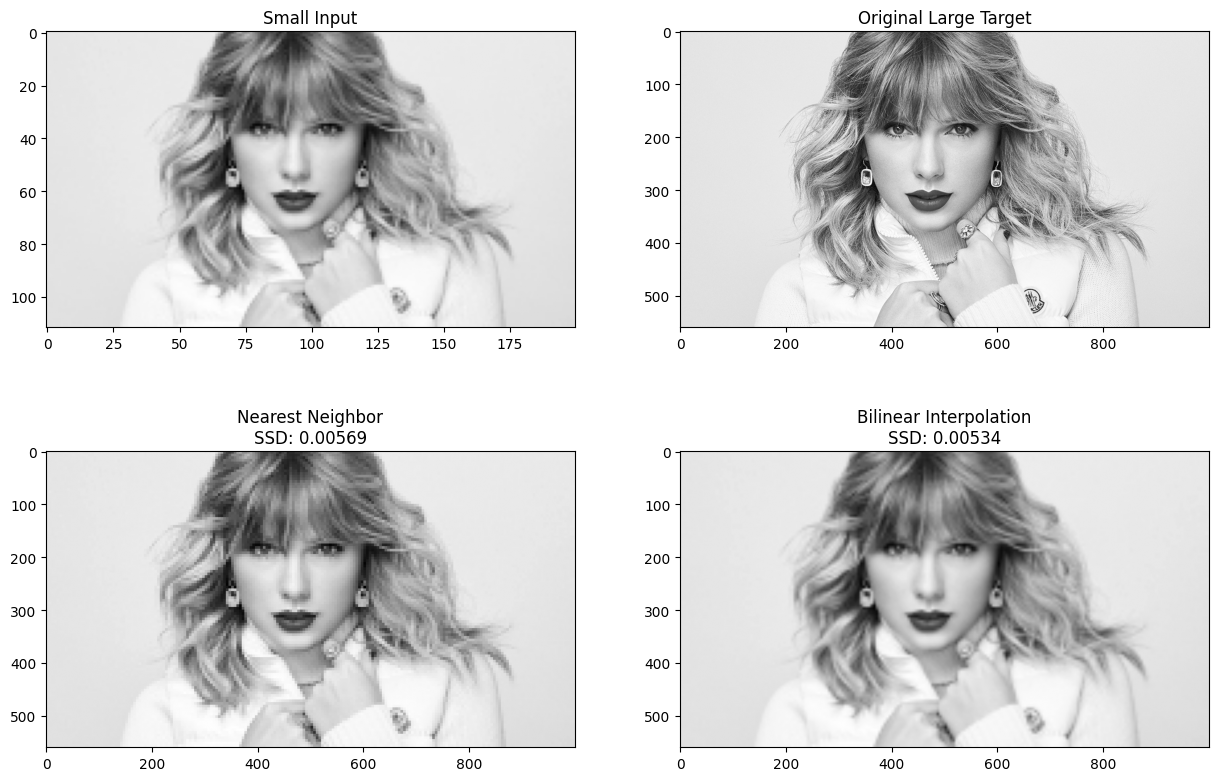

In [11]:
large_path = 'media/images_for_zooming/a1q5images/taylor.jpg'
small_path = 'media/images_for_zooming/a1q5images/taylor_small.jpg'

small_img = cv.imread(small_path, cv.IMREAD_GRAYSCALE)
large_img = cv.imread(large_path, cv.IMREAD_GRAYSCALE)

if small_img is None or large_img is None:
    print("Error: Could not load images. Check paths.")
else:
    target_height = large_img.shape[0]
    current_height = small_img.shape[0]
    
    calculated_scale = target_height / current_height
    print(f"Calculated Scale Factor: {calculated_scale:.2f}")

    zoom_nn = zoom_image(small_img, calculated_scale, 'nearest')
    zoom_bl = zoom_image(small_img, calculated_scale, 'bilinear')

    ssd_nn = normalized_ssd(large_img, zoom_nn)
    ssd_bl = normalized_ssd(large_img, zoom_bl)

    print(f"\n--- Results ---")
    print(f"SSD (Nearest Neighbor): {ssd_nn:.6f}")
    print(f"SSD (Bilinear):         {ssd_bl:.6f}")

    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(small_img, cmap='gray')
    plt.title("Small Input")
    
    plt.subplot(2, 2, 2)
    plt.imshow(large_img, cmap='gray')
    plt.title("Original Large Target")
    
    plt.subplot(2, 2, 3)
    plt.imshow(zoom_nn, cmap='gray')
    plt.title(f"Nearest Neighbor\nSSD: {ssd_nn:.5f}")
    
    plt.subplot(2, 2, 4)
    plt.imshow(zoom_bl, cmap='gray')
    plt.title(f"Bilinear Interpolation\nSSD: {ssd_bl:.5f}")
    
    plt.show()

Calculated Scale Factor: 20.00
Zooming nearest: 50x28 -> 1000x560
Zooming bilinear: 50x28 -> 1000x560

--- Results ---
SSD (Nearest Neighbor): 0.011423
SSD (Bilinear):         0.010598


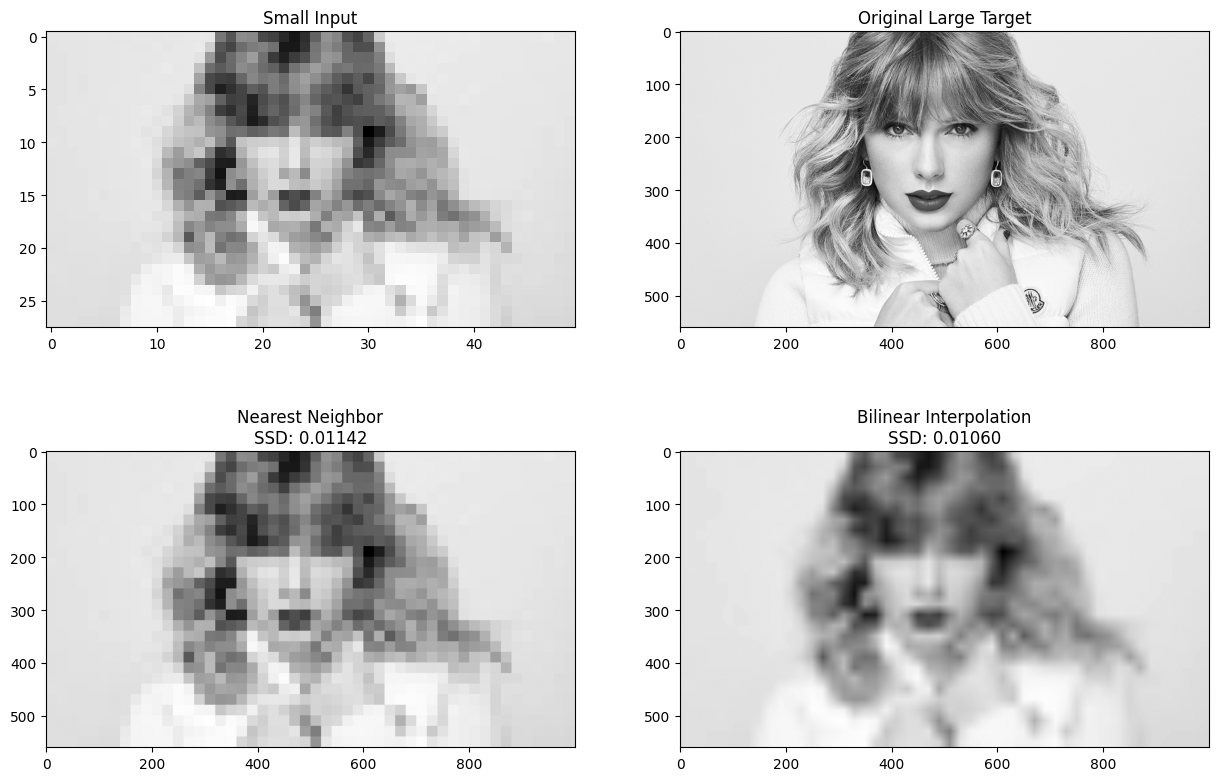

In [8]:
large_path = 'media/images_for_zooming/a1q5images/taylor.jpg'
small_path = 'media/images_for_zooming/a1q5images/taylor_very_small.jpg'

small_img = cv.imread(small_path, cv.IMREAD_GRAYSCALE)
large_img = cv.imread(large_path, cv.IMREAD_GRAYSCALE)

if small_img is None or large_img is None:
    print("Error: Could not load images. Check paths.")
else:
    target_height = large_img.shape[0]
    current_height = small_img.shape[0]
    
    calculated_scale = target_height / current_height
    print(f"Calculated Scale Factor: {calculated_scale:.2f}")

    zoom_nn = zoom_image(small_img, calculated_scale, 'nearest')
    zoom_bl = zoom_image(small_img, calculated_scale, 'bilinear')

    ssd_nn = normalized_ssd(large_img, zoom_nn)
    ssd_bl = normalized_ssd(large_img, zoom_bl)

    print(f"\n--- Results ---")
    print(f"SSD (Nearest Neighbor): {ssd_nn:.6f}")
    print(f"SSD (Bilinear):         {ssd_bl:.6f}")

    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(small_img, cmap='gray')
    plt.title("Small Input")
    
    plt.subplot(2, 2, 2)
    plt.imshow(large_img, cmap='gray')
    plt.title("Original Large Target")
    
    plt.subplot(2, 2, 3)
    plt.imshow(zoom_nn, cmap='gray')
    plt.title(f"Nearest Neighbor\nSSD: {ssd_nn:.5f}")
    
    plt.subplot(2, 2, 4)
    plt.imshow(zoom_bl, cmap='gray')
    plt.title(f"Bilinear Interpolation\nSSD: {ssd_bl:.5f}")
    
    plt.show()